In [1]:
#!pip install kaggle

In [2]:
#!kaggle competitions download -c spaceship-titanic

- Documentation link : [here](https://www.kaggle.com/competitions/spaceship-titanic/data)

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data_train = pd.read_csv('spaceship-titanic/train.csv')
df_train = data_train.copy()

In [5]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
data_train.isnull().sum()/len(data_train)*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [8]:
data_train.shape

(8693, 14)

# EDA

In [45]:
df_train.dropna(inplace=True)

In [9]:
cat_cols = data_train.select_dtypes(include='O').columns.tolist()
cat_cols

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

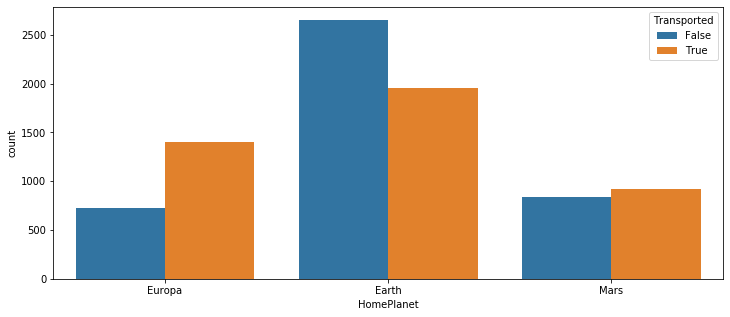

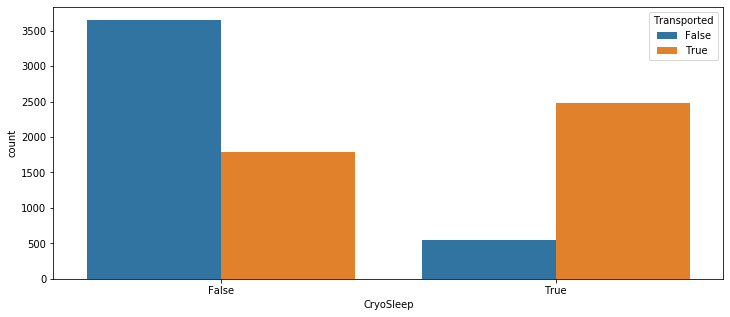

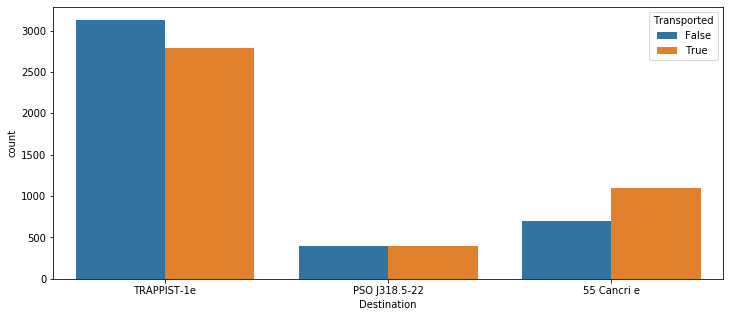

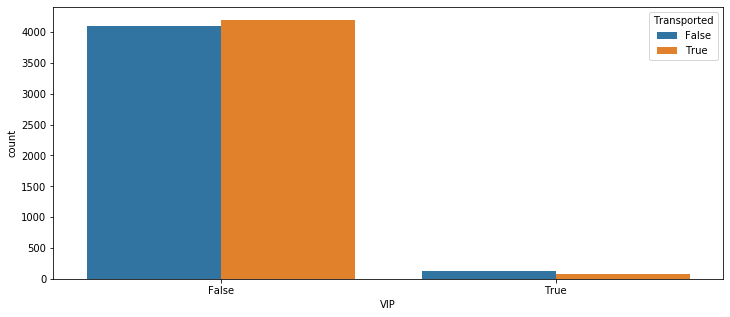

In [66]:
cat_cols = data_train.select_dtypes(include='O').columns.tolist()
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=data_train, x=col, hue='Transported')
    

## Passenger ID

In [14]:
df_train['PassengerId'].iloc[0][:4]

'0001'

In [15]:
def get_passenger_group(passenger_id:str):
    return passenger_id[:-4]

In [16]:
df_train['PassengerGroup'] = df_train['PassengerId'].apply(get_passenger_group)

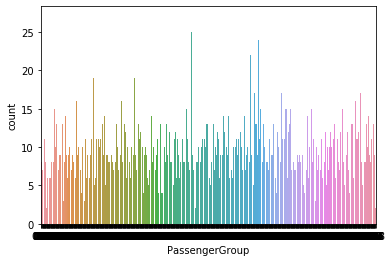

In [18]:
sns.countplot(data = df_train, x='PassengerGroup')

In [20]:
df_train['PassengerGroup'].unique().shape

(929,)

**Cabin**

In [25]:
df_train['Cabin'].iloc[:10]

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [41]:
def get_cabin_desk(cabin:str):
    return cabin[0]
def get_cabin_side(cabin:str):
    return cabin[-1]

In [42]:
df_train['cabin_desk'] = df_train['Cabin'].apply(get_cabin_desk)
df_train['cabin_side'] = df_train['Cabin'].apply(get_cabin_side)

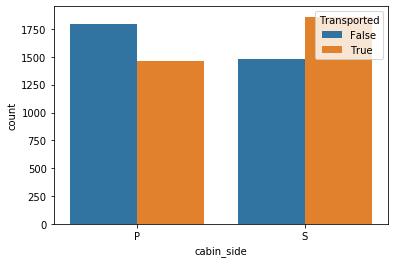

In [67]:
sns.countplot(data=df_train, x='cabin_side', hue='Transported')

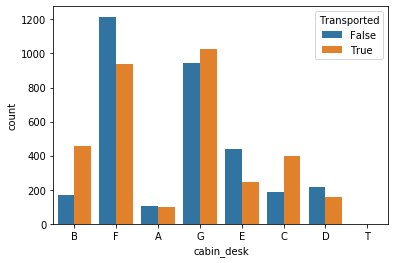

In [68]:
sns.countplot(data=df_train, x='cabin_desk', hue='Transported')

**Name**

In [46]:
df_train.shape

(6606, 17)

In [49]:
df_train['Name'].iloc[:10]

0        Maham Ofracculy
1           Juanna Vines
2          Altark Susent
3           Solam Susent
4      Willy Santantines
5      Sandie Hinetthews
6     Billex Jacostaffey
8          Andona Beston
9         Erraiam Flatic
11         Wezena Flatic
Name: Name, dtype: object

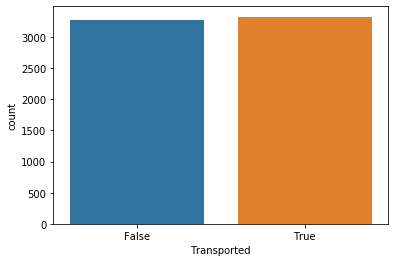

In [52]:
sns.countplot(data=df_train, x='Transported')

### Numerical variables

In [56]:
num_cols = df_train.select_dtypes(include=float).columns.tolist()

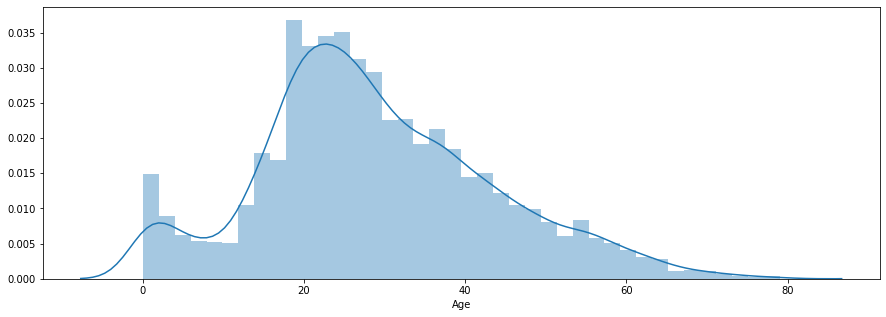

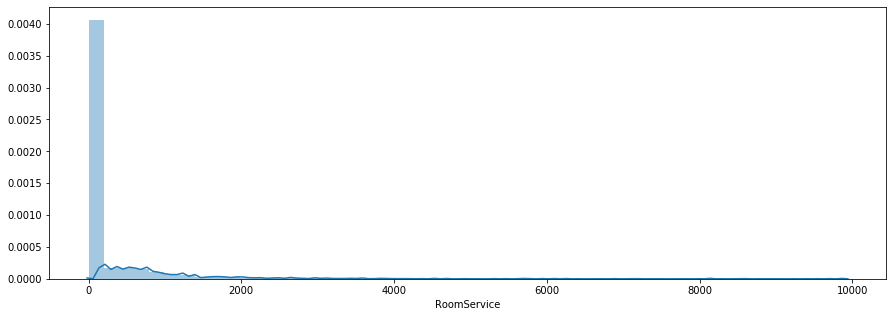

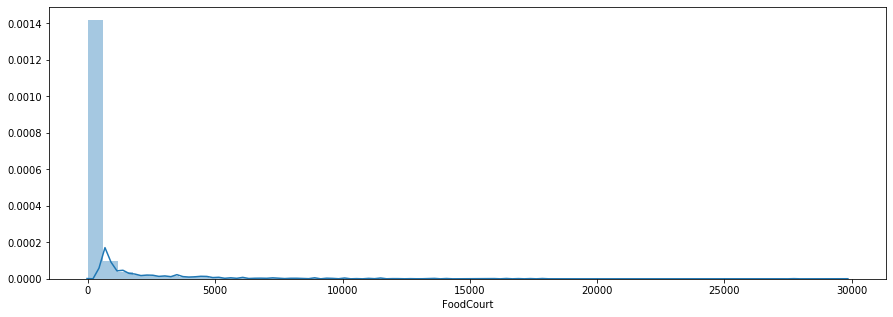

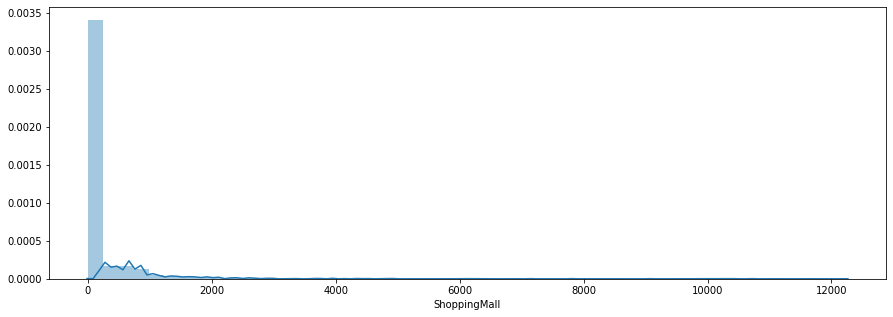

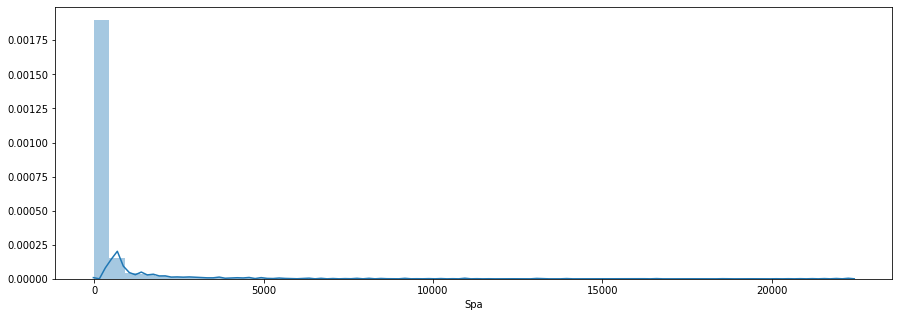

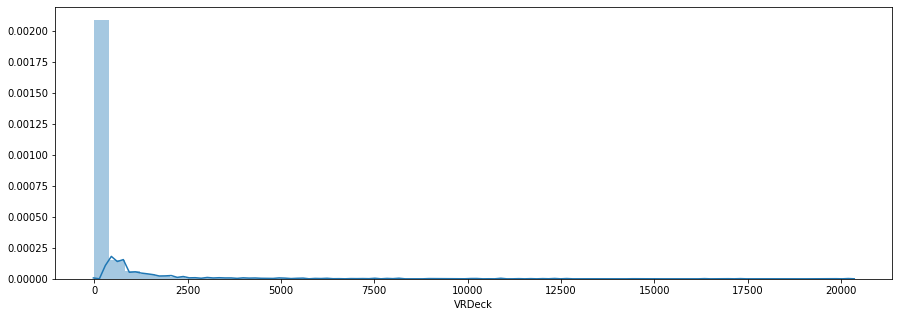

In [64]:
for col in num_cols:
    plt.figure(figsize=(15,5))
    sns.distplot(df_train[col])

In [65]:
df_train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553
RoomService,0.074783,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,0.135844,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,0.042314,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,0.123820,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,0.105031,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950
Transported,-0.082553,-0.247291,0.055025,0.011602,-0.219854,-0.207950,1.000000


## Feature Engineering

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     6606 non-null   object 
 1   HomePlanet      6606 non-null   object 
 2   CryoSleep       6606 non-null   object 
 3   Cabin           6606 non-null   object 
 4   Destination     6606 non-null   object 
 5   Age             6606 non-null   float64
 6   VIP             6606 non-null   object 
 7   RoomService     6606 non-null   float64
 8   FoodCourt       6606 non-null   float64
 9   ShoppingMall    6606 non-null   float64
 10  Spa             6606 non-null   float64
 11  VRDeck          6606 non-null   float64
 12  Name            6606 non-null   object 
 13  Transported     6606 non-null   bool   
 14  PassengerGroup  6606 non-null   object 
 15  cabin_side      6606 non-null   object 
 16  cabin_desk      6606 non-null   object 
dtypes: bool(1), float64(6), object(10

In [70]:
cols_to_drop = ['PassengerId', 'Cabin', "PassengerGroup", "Name"]

In [71]:
df_train.drop(columns=cols_to_drop, inplace=True)

In [72]:
df_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'cabin_side', 'cabin_desk'],
      dtype='object')

In [74]:
y = df_train['Transported']
X = df_train.drop(columns=["Transported"])

In [76]:
cat_cols = X.select_dtypes(include='O').columns.tolist()
num_cols = X.select_dtypes(exclude='O').columns.tolist()

In [77]:
print(f"> Categorical columns are : {cat_cols}")
print(f"> Numerical columns are : {num_cols}")

> Categorical columns are : ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'cabin_side', 'cabin_desk']
> Numerical columns are : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score, train_test_split

In [102]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("lg", FunctionTransformer(np.log1p)),
           ("scaler", StandardScaler(with_mean=False))]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        #("selector", SelectPercentile(chi2, percentile=50)),
        ("scaler", StandardScaler(with_mean=False))
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

In [103]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", RandomForestClassifier(n_estimators=500))]
)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0, cv=4)
#clf.fit(X_train, y_train)
#print("model score: %.3f" % clf.score(X_test, y_test))

scores = cross_val_score(clf, X, y, cv=5)
print(f'> Test Score =  {np.mean(scores):.2f} ({np.std(scores):.2f})')

> Test Score =  0.79 (0.01)
